In [1]:
import pandas as pd
import seaborn as sns
import sqlite3
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.figure import SubFigure

In [2]:
def set_palette():
    # IBM colorblind safe palette from https://lospec.com/palette-list/ibm-color-blind-safe
    colors = [
        "#648fff",  # temperature
        "#ffb000",  # pressure
        "#785ef0",  # rxn/spec
        "#dc267f",  # rxn/spec
        "#000000",  # rxn/spec
        "#fe6100",  # rxn/spec
        # "#ffffff",  # not useful here
    ]
    sns.set_palette(colors)


set_palette()

In [3]:
db_path = "/home/mick/DetResearch/scripts/final_manuscript/co2_reaction_study_less_znd.sqlite"
con = sqlite3.connect(db_path)

conditions = pd.read_sql_query("select * from conditions", con)
conditions

,id,sim_type,mech,initial_temp,initial_press,fuel,oxidizer,equivalence,diluent,dil_mf
0,1,znd,gri30_highT.xml,300.0,101325.0,CH4,N2O,1.0,N2,0.223563
1,2,znd,gri30_highT.xml,300.0,101325.0,CH4,N2O,1.0,N2,0.200000
2,3,znd,gri30_highT.xml,300.0,101325.0,CH4,N2O,1.0,CO2,0.200000
3,4,znd,gri30_highT.xml,300.0,101325.0,CH4,N2O,1.0,CO2,0.100000
4,5,znd,gri30_highT.xml,300.0,101325.0,CH4,N2O,1.0,N2,0.100000
5,6,znd,gri30_highT.xml,300.0,101325.0,CH4,N2O,1.0,N2,0.373389
6,7,cv,gri30_highT.xml,300.0,101325.0,CH4,N2O,1.0,CO2,0.200000
7,8,cv,gri30_highT.xml,300.0,101325.0,CH4,N2O,1.0,N2,0.373389
8,9,cv,gri30_highT.xml,300.0,101325.0,CH4,N2O,1.0,N2,0.200000
9,10,cv,gri30_highT.xml,300.0,101325.0,CH4,N2O,1.0,N2,0.223563


In [4]:
reactions = pd.read_sql_query(
    """
select
	rc.condition_id,
	rc.run_no,
	rc.sim_type,
	rc.reaction,
	rc.diluent,
	rc.dil_mf,
	rc.time,
	rc.fwd_rate_constant,
	rc.fwd_rate_of_progress,
	b.temperature,
	b.pressure
from
	(
        (
	select
		*
	from
		reactions r
	inner join conditions c
        on
		c.id = r.condition_id
        ) rc
inner join bulk_properties b
        on
	b.condition_id = rc.condition_id
	AND b.time = rc.time
	AND b.run_no = rc.run_no
   )
    """,
    con,
)
reactions.head()

,condition_id,run_no,sim_type,reaction,diluent,dil_mf,time,fwd_rate_constant,fwd_rate_of_progress,temperature,pressure
0,1,1,znd,CO + OH <=> CO2 + H,N2,0.223563,0.000000e+00,4.697442e+08,0.0,1817.624269,5.912932e+06
1,1,1,znd,CO + HO2 <=> CO2 + OH,N2,0.223563,0.000000e+00,2.180223e+08,0.0,1817.624269,5.912932e+06
2,1,1,znd,HNCO + OH <=> CO2 + NH2,N2,0.223563,0.000000e+00,9.438812e+07,0.0,1817.624269,5.912932e+06
3,1,1,znd,CO + OH <=> CO2 + H,N2,0.223563,7.354728e-09,4.696970e+08,0.0,1817.477827,5.912954e+06
4,1,1,znd,CO + HO2 <=> CO2 + OH,N2,0.223563,7.354728e-09,2.179076e+08,0.0,1817.477827,5.912954e+06


In [5]:
species = pd.read_sql_query(
    """
select
	rc.condition_id,
	rc.run_no,
	rc.sim_type,
	rc.species,
	rc.diluent,
	rc.dil_mf,
	rc.time,
	rc.mole_frac,
	rc.concentration,
	rc.creation_rate,
	b.temperature,
	b.pressure
from
	(
        (
	select
		*
	from
		species r
	inner join conditions c
        on
		c.id = r.condition_id
        ) rc
inner join bulk_properties b
        on
	b.condition_id = rc.condition_id
	AND b.time = rc.time
	AND b.run_no = rc.run_no
   )
    """,
    con,
)
species.head()

,condition_id,run_no,sim_type,species,diluent,dil_mf,time,mole_frac,concentration,creation_rate,temperature,pressure
0,1,1,znd,CO2,N2,0.223563,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1817.624269,5.912932e+06
1,1,1,znd,OH,N2,0.223563,0.000000e+00,0.000000e+00,0.000000e+00,15.077741,1817.624269,5.912932e+06
2,1,1,znd,H,N2,0.223563,0.000000e+00,6.730780e-09,2.633480e-09,68.061703,1817.624269,5.912932e+06
3,1,1,znd,CO2,N2,0.223563,7.354728e-09,0.000000e+00,0.000000e+00,0.000000,1817.477827,5.912954e+06
4,1,1,znd,OH,N2,0.223563,7.354728e-09,0.000000e+00,0.000000e+00,8951.268349,1817.477827,5.912954e+06


In [23]:
from dataclasses import dataclass
from typing import Literal, Optional, Union
from matplotlib.ticker import EngFormatter, ScalarFormatter, StrMethodFormatter, FuncFormatter


@dataclass(frozen=True)
class DataColumn:
    column_name: str
    plot_name: str
    data_type: Union[Literal["reaction"], Literal["species"]]
    units: Optional[str]
    scale_by: Optional[float] = None


class Species:
    # Will have to generalize this a bit if we start using more complex species
    def __init__(self, element: str, number: int):
        self.element = element
        self.number = number

    def as_string(self) -> str:
        return f"{self.element}{self.number}"

    def as_tex_string(self) -> str:
        return f"{self.element}_{{{self.number}}}"


class DataColumnSpecies:
    mole_frac = DataColumn(
        column_name="mole_frac",
        plot_name="Mole Fraction",
        units="-",
        data_type="species",
    )
    concentration = DataColumn(
        column_name="concentration",
        plot_name="Concentration",
        units=r"\frac{ \mathrm{kmol} }{ \mathrm{m}^{3} }",
        data_type="species",
        scale_by=1_000,
    )
    creation_rate = DataColumn(
        column_name="creation_rate",
        plot_name="Creation Rate",
        units=r"\frac{ \mathrm{kmol} }{ \mathrm{m}^{3} \cdot \mathrm{s} }",
        data_type="species",
        scale_by=10_000_000,
    )


class DataColumnReaction:
    fwd_rate_constant = DataColumn(
        column_name="fwd_rate_constant",
        plot_name="Forward Rate\nConstant",
        units=None,
        data_type="reaction",
    )
    fwd_rate_of_progress = DataColumn(
        column_name="fwd_rate_of_progress",
        plot_name="Forward Rate of\nProgress",
        units=r"\frac{ \mathrm{kmol} }{ \mathrm{m}^{3} \cdot \mathrm{s} }",
        scale_by=10_000,
        data_type="reaction",
    )


class SimulationPlot:
    def __init__(
        self,
        conditions: plt.Axes,
        results: plt.Axes,
        relative_dilution: Union[Literal["High"], Literal["Low"]],
        diluent: Optional[Species] = None,
        title_fontsize: int = 9,
        axis_fontsize: int = 6,
        legend_fontsize: int = 5,
    ):
        self.temperature = conditions
        self.pressure = conditions.twinx()
        self.results = results
        self.relative_dilution = relative_dilution
        self.diluent = diluent

        self._dil_mf = None

        self._title_fontsize = title_fontsize
        self._axis_fontsize = axis_fontsize
        self._legend_fontsize = legend_fontsize

        for axes in (self.temperature, self.pressure, self.results):
            axes.yaxis.get_offset_text().set_fontsize(self._axis_fontsize)
            for ax in (axes.xaxis, axes.yaxis):
                ax.set_tick_params(labelsize=self._axis_fontsize)
        self.set_title()

    def align_all_axes(self):
        self.pressure.yaxis.set_label_coords(1.1, 0.5)
        self.temperature.yaxis.set_label_coords(-0.1, 0.5)
        self.results.yaxis.set_label_coords(-0.1, 0.5)  # wtf why don't these line up

    def set_dil_mf(self, dil_mf: float):
        self._dil_mf = dil_mf
        self.set_title()

    def set_title(self):
        title = f"{self.relative_dilution} dilution"
        if self._dil_mf is not None:
            title += r" $\left(" + f"\chi_{{{self.diluent.as_tex_string()}}} = {self._dil_mf:3.2f}" + r"\right)$"
        # we should be able to set this on temperature or pressure since they share a subplot
        self.temperature.set_title(title, fontsize=self._title_fontsize)

    def plot_data(
        self,
        data: pd.DataFrame,
        data_column: DataColumn,
        result_designator_column: str,
    ):
        """
        Parameters
        ==========
        data: simulation data to plot
        data_column: column designating data to plot in the lower half of the combined plot
        result_designator_column : column designating reaction or species values, each of which will have a data plot entry
        """
        plot_data = data.sort_values("time")
        plot_data["time"] *= 1_000_000  # s -> us
        plot_data["pressure"] /= 1_000_000  # Pa -> MPa
        plot_data["temperature"] /= 1_000  # K -> kK

        dil_mfs = plot_data["dil_mf"].unique()
        if len(dil_mfs) != 1:
            raise RuntimeError(f"Data does not have a unique `dil_mf`: {dil_mfs}")
        self.set_dil_mf(dil_mfs[0])

        line_pressure = self.pressure.plot(plot_data["time"], plot_data["pressure"], ls="-", color="C1", label="P")
        line_temperature = self.temperature.plot(
            plot_data["time"], plot_data["temperature"], ls="--", color="C0", label="T"
        )
        self.pressure.set_ylabel("Pressure (MPa)", fontsize=self._axis_fontsize)
        self.temperature.set_ylabel("Temperature\n(K x1,000)", fontsize=self._axis_fontsize)

        lines = line_pressure + line_temperature
        labels = [l.get_label() for l in lines]
        # we should be able to set this on temperature or pressure since they share a subplot
        self.temperature.legend(lines, labels, loc=5, fontsize=self._legend_fontsize)

        # reaction/species plots
        color_indices = [2, 3, 4, 5]
        n_colors = len(color_indices)
        line_styles = ["-", "--", "-.", ":"]
        n_styles = len(line_styles)
        lines = []
        for i, (label, data_group) in enumerate(plot_data.groupby(result_designator_column)):
            color_idx = color_indices[i % n_colors]
            # if we expand the number of reactions/species and need more differentiation between lines, we can always cycle
            # through styles at a slower rate
            ls = line_styles[i % n_styles]
            lines += self.results.plot(
                data_group["time"],
                data_group[data_column.column_name] / (data_column.scale_by or 1),
                color=f"C{color_idx}",
                label=label,
                ls=ls,
            )
        labels = [l.get_label() for l in lines]

        ylabel = data_column.plot_name
        if data_column.units:
            ylabel += (
                r" $\left("
                + f"{data_column.units}"
                + (f"x{data_column.scale_by:,}" if data_column.scale_by else "")
                + r"\right)$"
            )
        self.results.legend(lines, labels, fontsize=self._legend_fontsize)
        self.results.set_ylabel(ylabel, fontsize=self._axis_fontsize)
        self.results.set_xlabel(r"Time $\left( \mu \mathrm{s} \right)$", fontsize=self._axis_fontsize)
        self.align_all_axes()


@dataclass
class SimulationPlotRow:
    dil_low: SimulationPlot
    dil_high: SimulationPlot
    row: plt.Axes


@dataclass(frozen=True)
class ResultConditionIds:
    dil_high: int
    dil_low: int


@dataclass(frozen=True)
class PlotConditionIds:
    sim_type: Union[Literal["cv"], Literal["znd"]]  # this can probably be smarter but whatever
    co2: ResultConditionIds
    n2_mf: ResultConditionIds
    n2_tad: ResultConditionIds


class SimulationPlots:
    def __init__(
        self,
        data: pd.DataFrame,
        data_column: DataColumn,
        condition_ids: PlotConditionIds,
        show_title: bool = False,
        save_to: Optional[str] = None,
        suptitle_fontsize: int = 12,
        row_fontsize: int = 10,
    ):
        self._figure: plt.Figure = None
        self._suptitle_fontsize = suptitle_fontsize

        # these need to match self_rows in self._create_plots(), and are set using setattr()
        self.co2: SimulationRow = None
        self.n2_mf: SimulationRow = None
        self.n2_tad: SimulationRow = None

        self._create_plots()

        self.co2.row.set_title("CO$_{2}$ diluted", fontsize=row_fontsize)
        self.n2_mf.row.set_title("N$_{2}$ diluted, mole fraction matched", fontsize=row_fontsize)
        self.n2_tad.row.set_title("N$_{2}$ diluted, T$_{ad}$ matched", fontsize=row_fontsize)

        if show_title:
            sim_kind = condition_ids.sim_type.upper()
            plot_kind = data_column.plot_name.replace("\n", " ")
            self._figure.suptitle(
                f"{sim_kind} Simulations ({plot_kind})",
                fontsize=self._suptitle_fontsize,
                y=0.925,
            )

        self._plot_data(data, data_column, condition_ids)
        self._figure.align_ylabels()

        if isinstance(save_to, str):
            self._figure.savefig(save_to)

    def _create_plots(self):
        self._figure = plt.figure(figsize=(8.5, 11))

        n2 = Species("N", 2)
        co2 = Species("CO", 2)

        diluents = (co2, n2, n2)
        self_rows = ("co2", "n2_mf", "n2_tad")  # these need to match rows in __init__()
        rows_gridspec = self._figure.add_gridspec(nrows=len(diluents), ncols=1, hspace=0.3)
        for self_row, diluent, row_gs in zip(self_rows, diluents, rows_gridspec):
            row = self._figure.add_subplot(row_gs)
            row.axis("off")

            # This little guy keeps the high/low dilution titles from overlapping with the row titles
            row_plots_and_title_gs = row_gs.subgridspec(2, 1, height_ratios=[1, 100])

            row_plots = row_plots_and_title_gs[1].subgridspec(2, 2, hspace=0, wspace=0.4)
            row_axes = []
            relative_dilutions = ["Low", "High"]
            for col, relative_dilution in enumerate(relative_dilutions):
                ax_conditions = self._figure.add_subplot(row_plots[0, col])
                ax_conditions.get_xaxis().set_visible(False)

                ax_results = self._figure.add_subplot(row_plots[1, col])
                row_axes.append(
                    SimulationPlot(
                        conditions=ax_conditions,
                        results=ax_results,
                        relative_dilution=relative_dilution,
                        diluent=diluent,
                    )
                )
            setattr(self, self_row, SimulationPlotRow(row=row, dil_low=row_axes[0], dil_high=row_axes[1]))

    def _plot_data(
        self,
        data: pd.DataFrame,
        data_column: DataColumn,
        condition_ids: PlotConditionIds,
    ):
        is_reaction_data = "reaction" in data.columns
        is_species_data = "species" in data.columns
        if is_reaction_data and is_species_data:
            raise RuntimeError("Data contains both reaction and species columns!")
        elif not (is_reaction_data or is_species_data):
            raise RuntimeError("Data doesn't contain reaction or species columns!")
        result_designator_column = "reaction" if is_reaction_data else "species"
        if data_column.data_type == "reaction" and is_species_data:
            raise RuntimeError("Reaction plots were requested but species data was provided!")
        elif data_column.data_type == "species" and is_reaction_data:
            raise RuntimeError("Species plots were requested but reaction data was provided!")

        # these need to match the keys for DataColumn and PlotConditionIds
        dilution_types = ("co2", "n2_mf", "n2_tad")
        relative_amounts = ("dil_low", "dil_high")
        for dilution_type in dilution_types:
            for relative_amount in relative_amounts:
                self.__dict__[dilution_type].__dict__[relative_amount].plot_data(
                    data=data[data["condition_id"] == condition_ids.__dict__[dilution_type].__dict__[relative_amount]],
                    data_column=data_column,
                    result_designator_column=result_designator_column,
                )


# todo: make all x, y scales identical

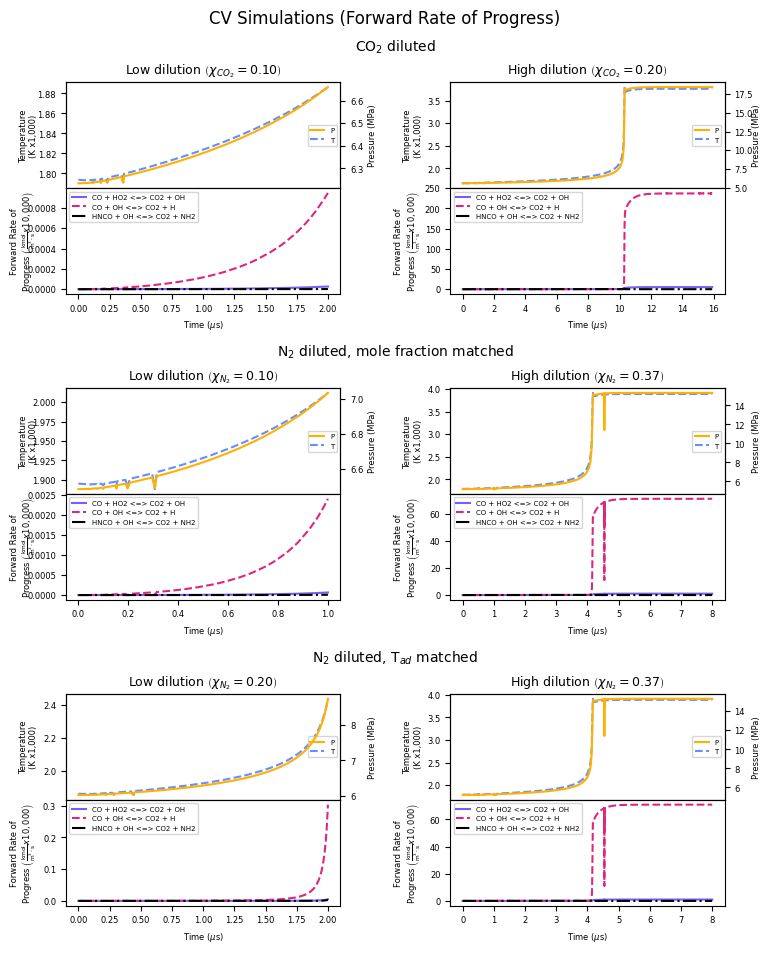

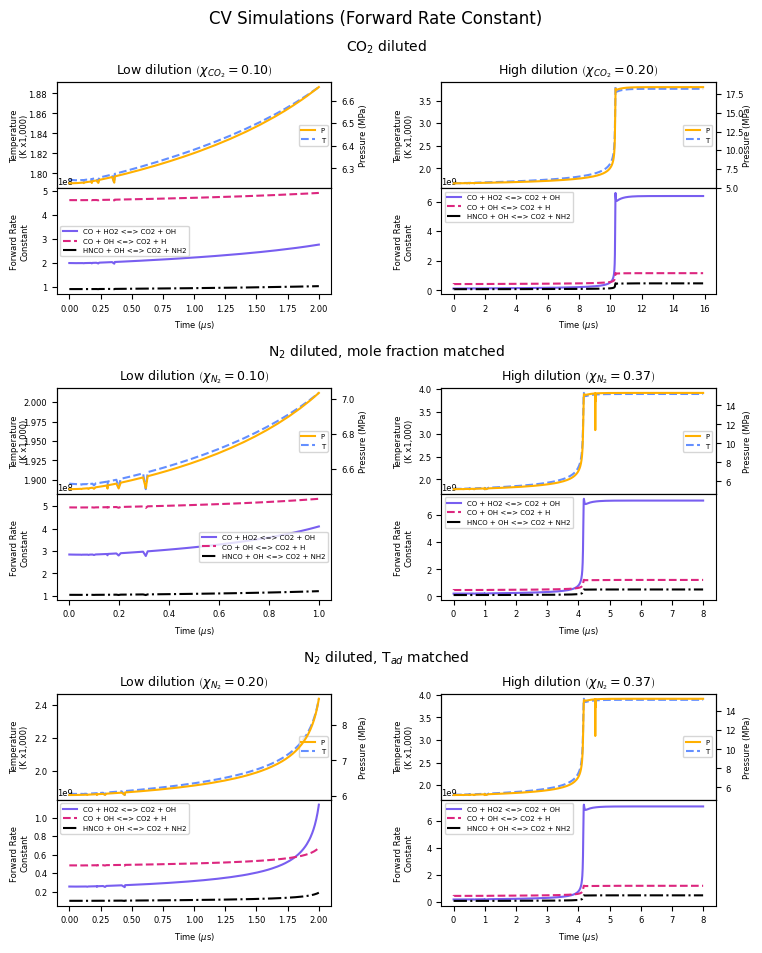

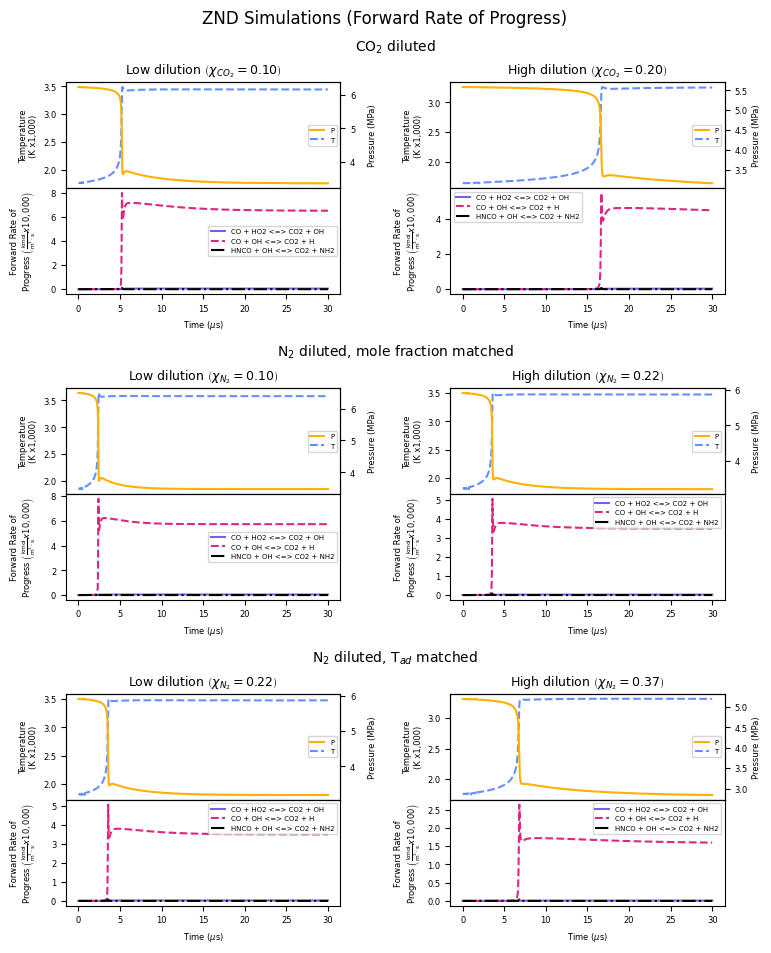

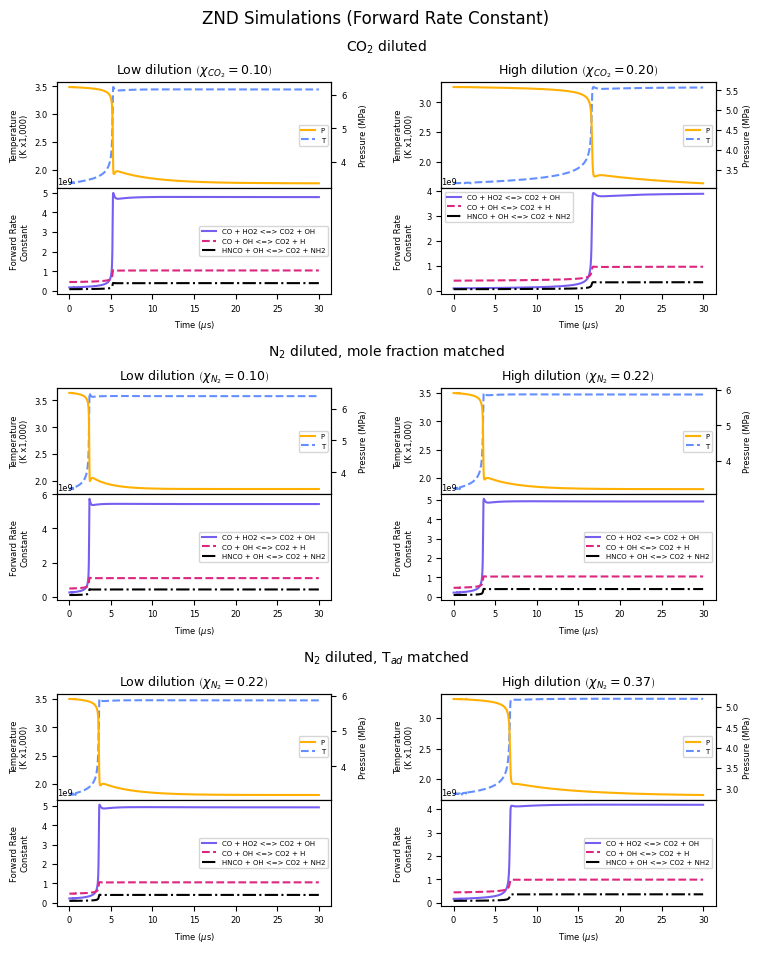

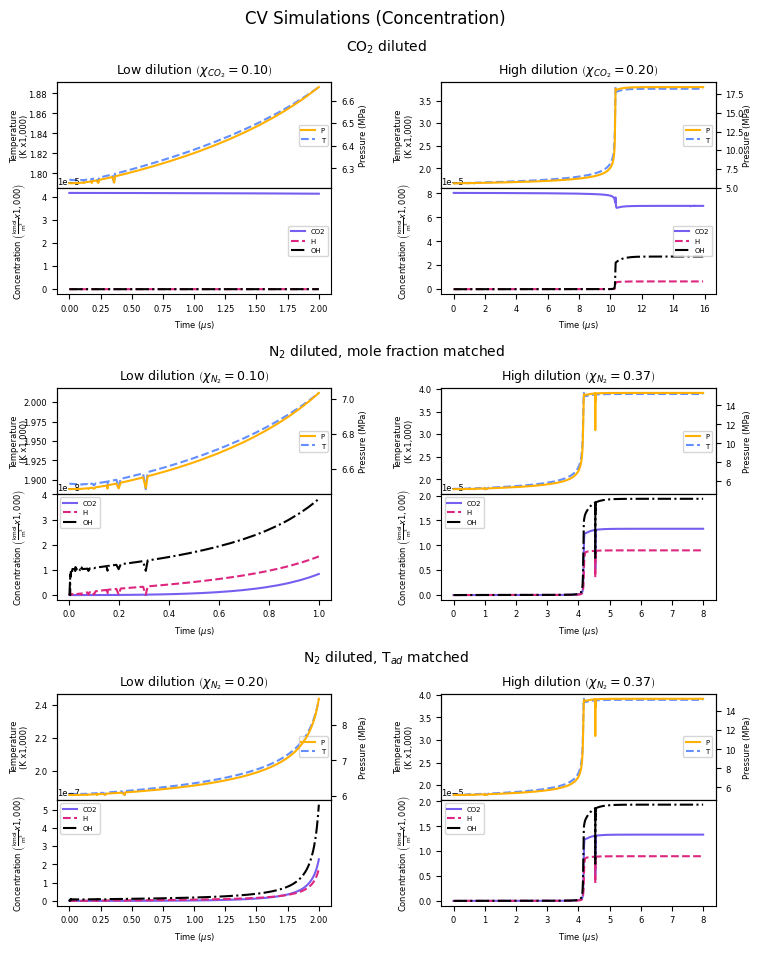

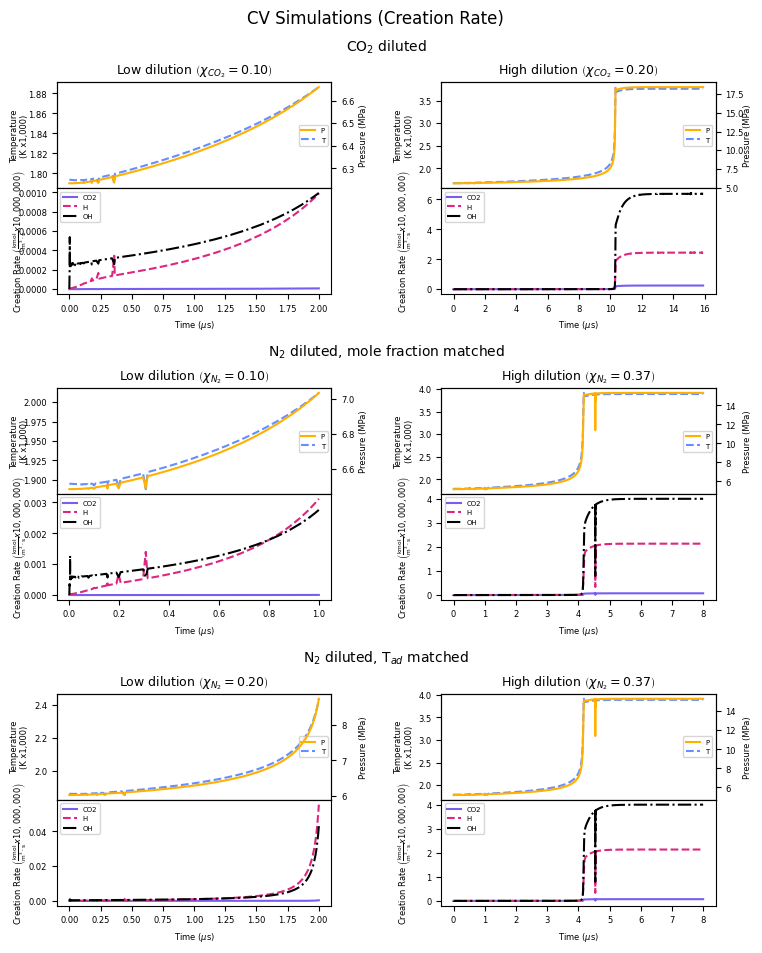

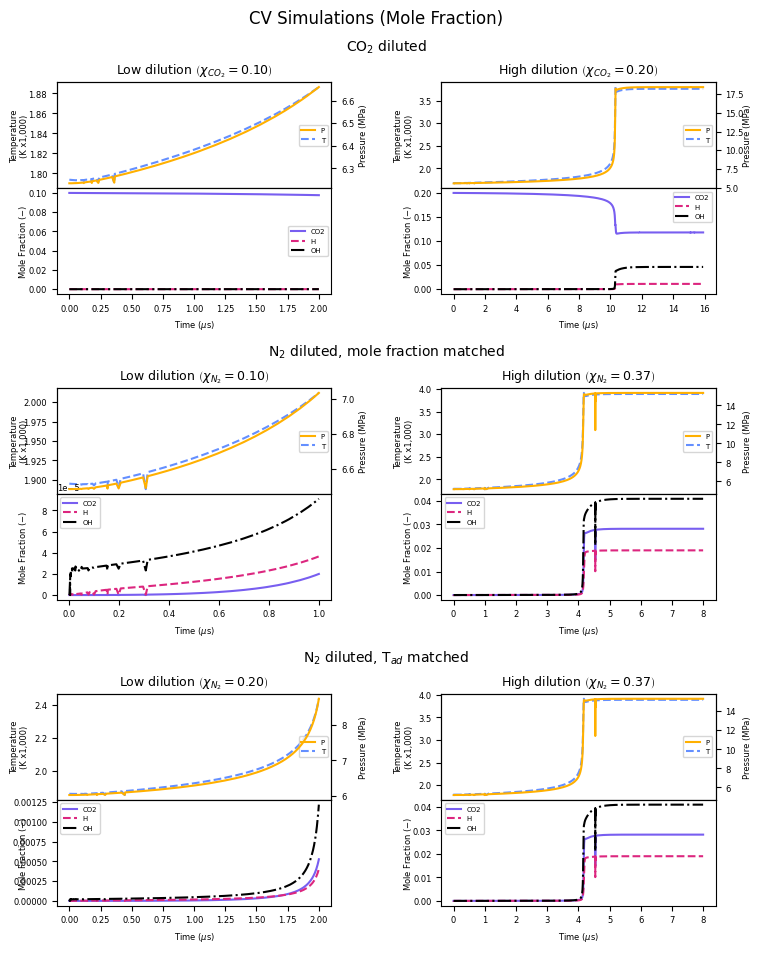

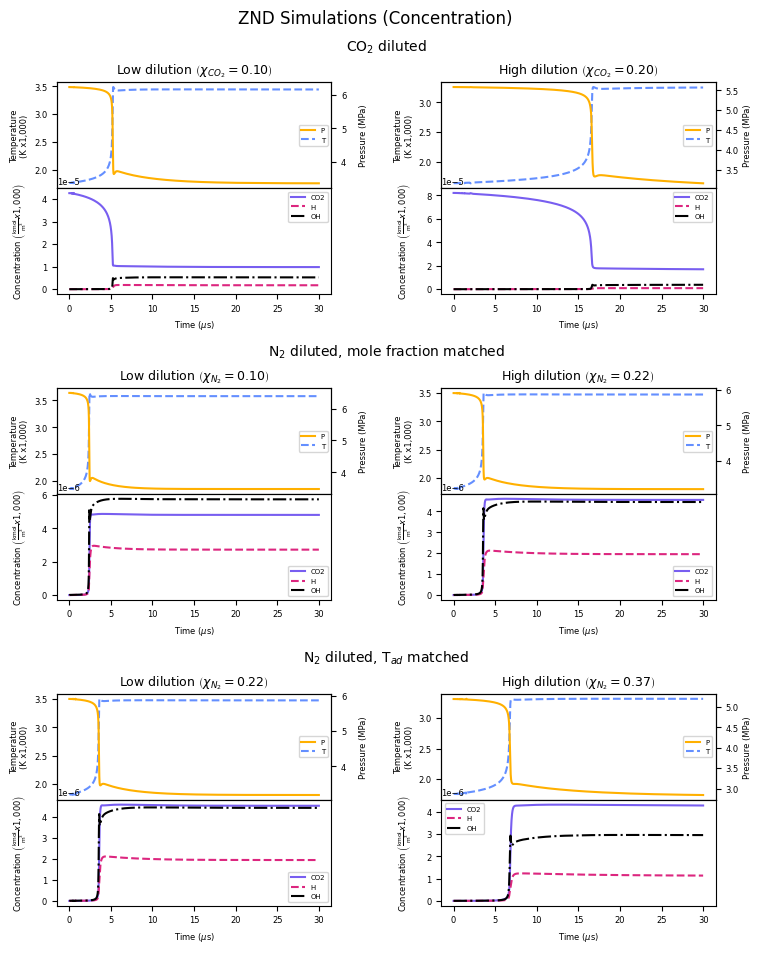

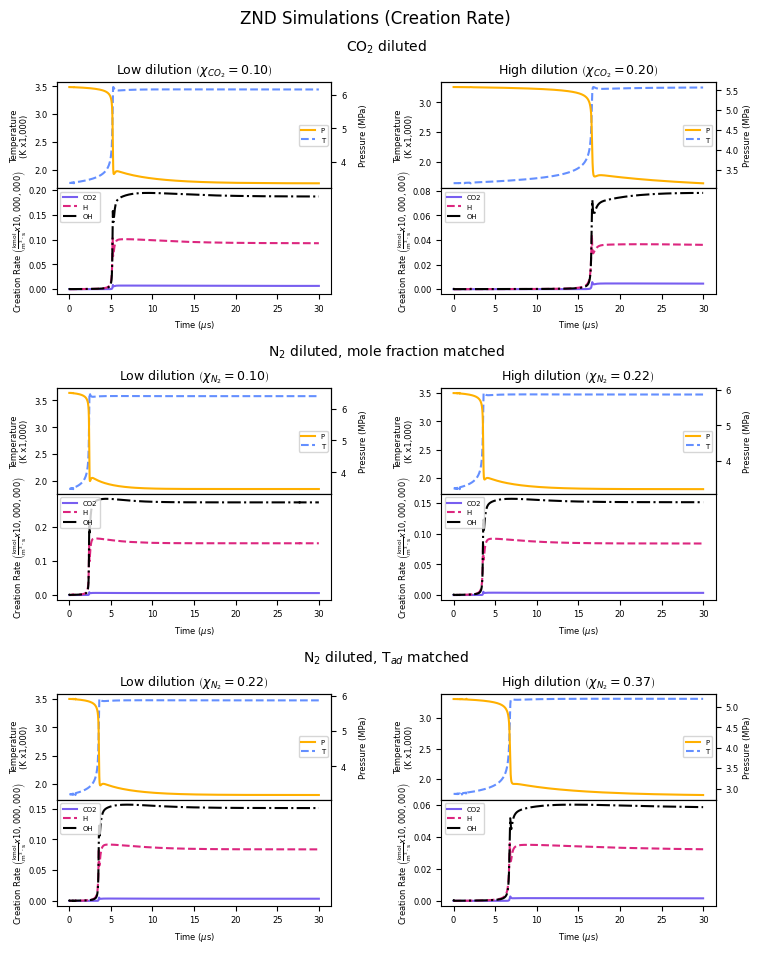

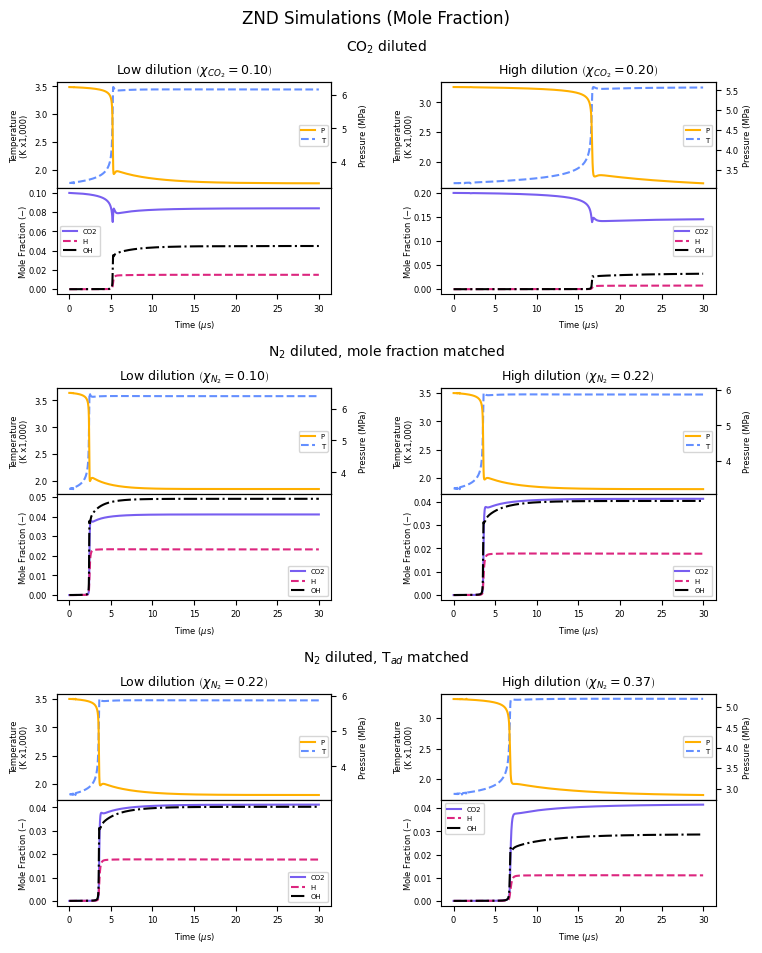

In [24]:
all_condition_ids = []
for sim_type, sim_type_conditions in conditions.groupby("sim_type"):
    all_condition_ids.append(
        PlotConditionIds(
            sim_type=sim_type,
            co2=ResultConditionIds(
                dil_high=sim_type_conditions[
                    ((sim_type_conditions["diluent"] == "CO2") & (sim_type_conditions["dil_mf"] > 0.15))
                ]["id"].values[0],
                dil_low=sim_type_conditions[
                    ((sim_type_conditions["diluent"] == "CO2") & (sim_type_conditions["dil_mf"] < 0.15))
                ]["id"].values[0],
            ),
            n2_mf=ResultConditionIds(
                dil_high=sim_type_conditions[
                    ((sim_type_conditions["diluent"] == "N2") & (sim_type_conditions["dil_mf"] > 0.15))
                ]["id"].values[0],
                dil_low=sim_type_conditions[
                    ((sim_type_conditions["diluent"] == "N2") & (sim_type_conditions["dil_mf"] < 0.15))
                ]["id"].values[0],
            ),
            n2_tad=ResultConditionIds(
                dil_high=sim_type_conditions[
                    ((sim_type_conditions["diluent"] == "N2") & (sim_type_conditions["dil_mf"] > 0.3))
                ]["id"].values[0],
                dil_low=sim_type_conditions[
                    ((sim_type_conditions["diluent"] == "N2") & (sim_type_conditions["dil_mf"] < 0.3))
                ]["id"].values[0],
            ),
        )
    )

all_data_sources = (reactions, species)
all_data_columns = (
    (DataColumnReaction.fwd_rate_of_progress, DataColumnReaction.fwd_rate_constant),
    (DataColumnSpecies.concentration, DataColumnSpecies.creation_rate, DataColumnSpecies.mole_frac),
)
for data_source, data_columns in zip(all_data_sources, all_data_columns):
    for condition_ids in all_condition_ids:
        for data_column in data_columns:
            SimulationPlots(
                data=data_source,
                condition_ids=condition_ids,
                data_column=data_column,
                show_title=True,
                save_to=f"plots/{condition_ids.sim_type} - {data_column.data_type} - {data_column.column_name}.pdf",
            )